In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
class TriplePlusMetric(metrics.BaseMetric):
    """See how many triple plus we get"""
    def __init__(self,  **kwargs):
        nightCol='night'
        super(TriplePlusMetric, self).__init__(col=nightCol, units='N triple+',**kwargs)
    def run(self, dataSlice, slicePoint=None):
        n_sorted = np.sort(dataSlice['night'])
        u_nights = np.unique(n_sorted)
        left = np.searchsorted(n_sorted, u_nights, side='left')
        right = np.searchsorted(n_sorted, u_nights, side='right')
        n_in_night = right-left
        ntp = np.where(n_in_night >=3)[0].size
        return ntp
    

In [8]:
dbFile = '../third_obs/third_obs_pt120v1.4_10yrs.db'#'baseline_v1.4_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)


In [9]:
bundleList = []
#sql = 'note like "pair_blob%"'
sql = ''
#metric = metrics.PassMetric(cols=['night', 'note'])
#slicer = slicers.UserPointsSlicer([0.], [0.])
#metric= metrics.CountMetric(col='filter')
metric = TriplePlusMetric()
slicer = slicers.HealpixSlicer()
plotDict = {'colorMax': 150}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'fieldDec', 'night'].
Found 2193340 visits
Running:  ['opsim_TriplePlus_night_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 272 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 64.0787  dipole: lon: -103.517, lat: -79.7052, amp: 24.6995
Plotting complete.


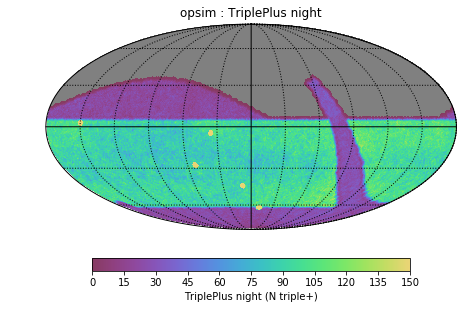

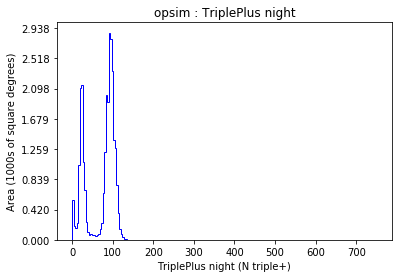

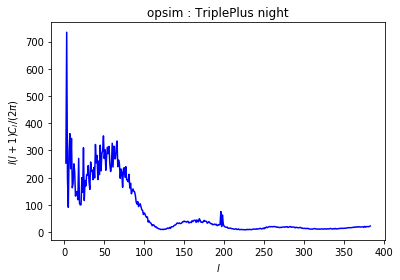

In [10]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'fieldDec', 'night'].
Found 2180589 visits
Running:  ['opsim_TriplePlus_night_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 286 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 62.0179  dipole: lon: -94.9493, lat: -81.9338, amp: 25.3828
Plotting complete.


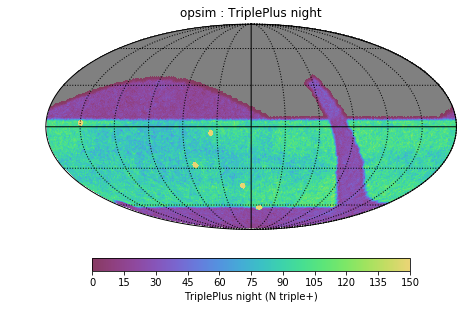

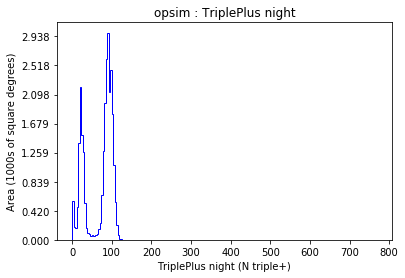

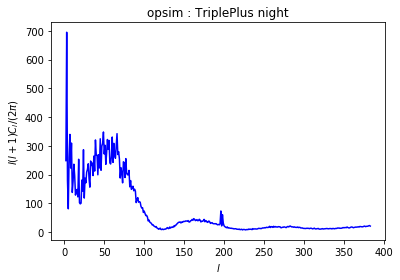

In [7]:
dbFile = 'baseline_v1.4_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

bundleList = []
#sql = 'note like "pair_blob%"'
sql = ''
#metric = metrics.PassMetric(cols=['night', 'note'])
#slicer = slicers.UserPointsSlicer([0.], [0.])
#metric= metrics.CountMetric(col='filter')
metric = TriplePlusMetric()
slicer = slicers.HealpixSlicer()
plotDict = {'colorMax': 150}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

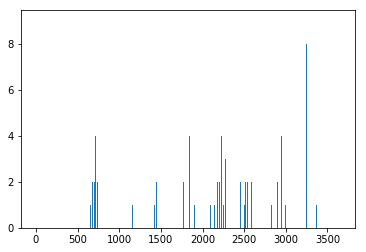

In [32]:
bins = np.arange(-1,365.25*10, 1)
ack = plt.hist(bundleList[0].metricValues[0]['night'], bins=bins)

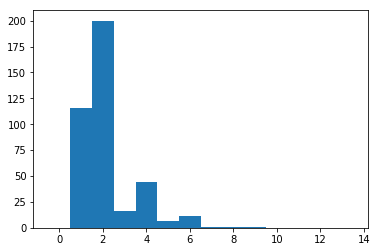

In [33]:
good = np.where(ack[0] > 0)
bins=np.arange(0,15,1)-.5
blah = plt.hist(ack[0][good], bins=bins)

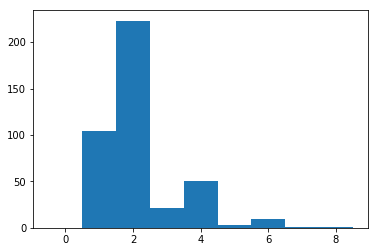

In [11]:
good = np.where(ack[0] > 0)
bins=np.arange(0,10,1)-.5
blah = plt.hist(ack[0][good], bins=bins)